##Prediction using Unsupervised Machine Learning
###By Darsh Doshi
####Task by The Spark Foundation

In [80]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
# plt.style.use('seaborn-whitegrid')
import pandas as pd
from sklearn import datasets


In [81]:
#loading the dataset from sklearn datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


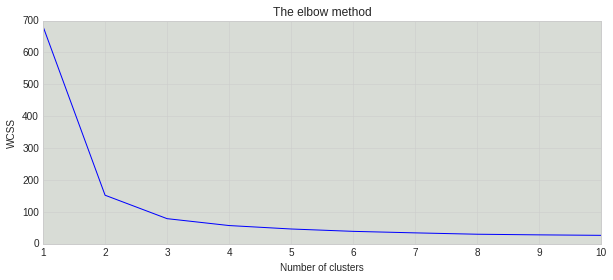

In [85]:
#Finding the number of clusters using K-Means Classification  
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,4))
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [83]:
#Applying K-Means to datasets
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

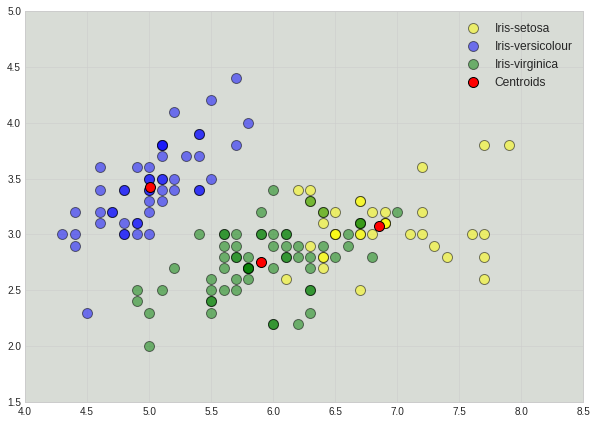

In [84]:
#Plotting the clusters
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
ax.set_facecolor('xkcd:light grey')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            alpha=0.5,s=100, c = 'Yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            alpha=0.5,s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            alpha=0.5,s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Red', label = 'Centroids')
plt.grid(True)
plt.legend()